In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import talib as ta
import yfinance as yf

# -----------------------------
# 1️⃣ Load CSV stock data
# -----------------------------
df = pd.read_csv('../data/AMZN.csv', parse_dates=['Date'])
df.set_index('Date', inplace=True)
df.sort_index(inplace=True)

print(df.head())

            Close    High     Low    Open     Volume
Date                                                
2009-01-02  2.718  2.7265  2.5535  2.5675  145928000
2009-01-05  2.703  2.7870  2.6515  2.7865  190196000
2009-01-06  2.868  2.9110  2.6875  2.7275  221602000
2009-01-07  2.810  2.8475  2.7675  2.8145  158854000
2009-01-08  2.858  2.8660  2.7290  2.7495  131558000


In [18]:
df['SMA_20'] = ta.SMA(df['Close'], timeperiod=20)
df['SMA_50'] = ta.SMA(df['Close'], timeperiod=50)

# Relative Strength Index
df['RSI'] = ta.RSI(df['Close'], timeperiod=14)

# MACD
macd, macdsignal, macdhist = ta.MACD(df['Close'], fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD'] = macd
df['MACD_Signal'] = macdsignal

print(df.tail())

                 Close        High         Low        Open    Volume  \
Date                                                                   
2023-12-22  153.419998  154.350006  152.710007  153.770004  29514100   
2023-12-26  153.410004  153.979996  153.029999  153.559998  25067200   
2023-12-27  153.339996  154.779999  153.119995  153.559998  31434700   
2023-12-28  153.380005  154.080002  152.949997  153.720001  27057000   
2023-12-29  151.940002  153.889999  151.029999  153.100006  39823200   

                SMA_20    SMA_50        RSI      MACD  MACD_Signal  
Date                                                                
2023-12-22  148.578999  141.2430  64.115558  3.135958     2.873052  
2023-12-26  148.863000  141.7154  64.085644  3.118650     2.922172  
2023-12-27  149.178500  142.1312  63.860893  3.063965     2.950530  
2023-12-28  149.531499  142.5694  63.938728  2.989395     2.958303  
2023-12-29  149.824000  143.0456  59.012257  2.782032     2.923049  


In [19]:
ticker = yf.Ticker('AMZN')
info = ticker.info

print("Company Info:")
print(f"Name: {info.get('shortName')}")
print(f"Market Cap: {info.get('marketCap')}")
print(f"PE Ratio: {info.get('trailingPE')}")
print(f"52-week High: {info.get('fiftyTwoWeekHigh')}")
print(f"52-week Low: {info.get('fiftyTwoWeekLow')}")


Company Info:
Name: Amazon.com, Inc.
Market Cap: 2359223910400
PE Ratio: 31.170904
52-week High: 258.6
52-week Low: 161.38


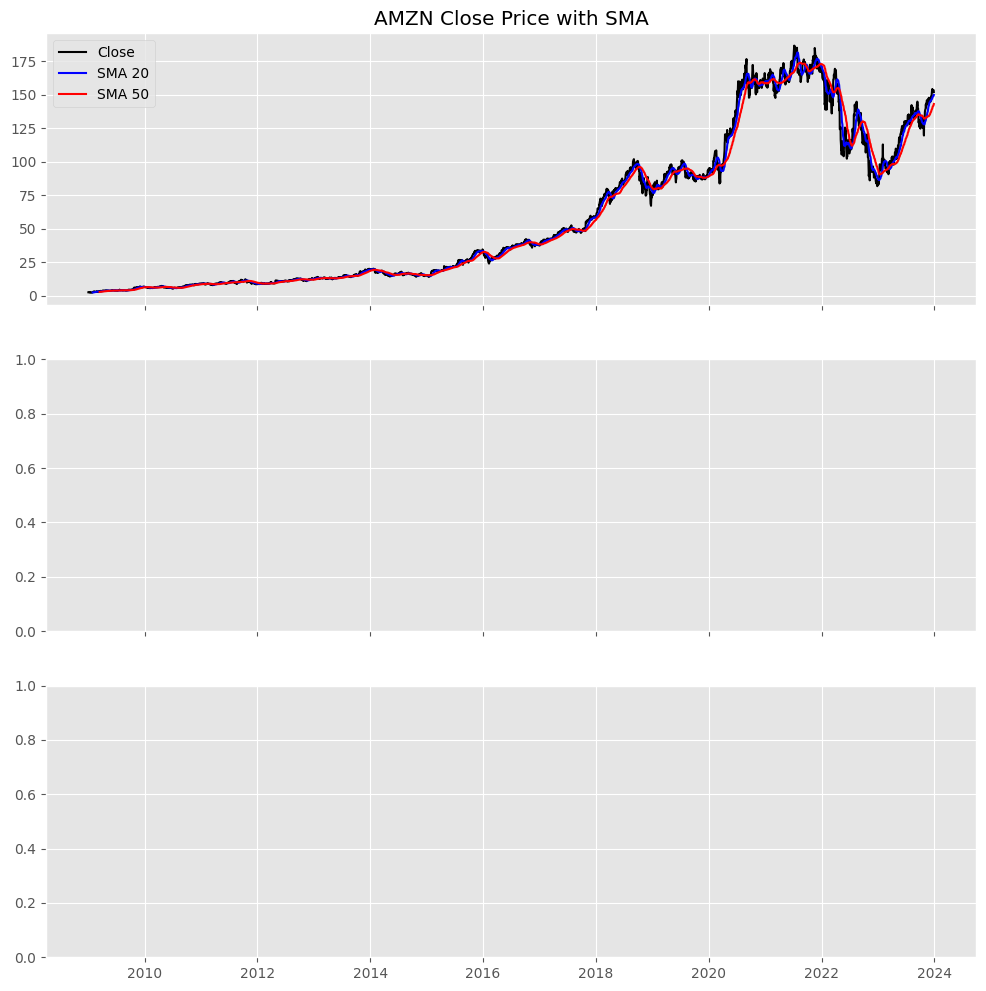

In [21]:
# -----------------------------
plt.style.use('ggplot')
fig, axes = plt.subplots(3, 1, figsize=(12, 12), sharex=True)

# Closing price + SMAs
axes[0].plot(df['Close'], label='Close', color='black')
axes[0].plot(df['SMA_20'], label='SMA 20', color='blue')
axes[0].plot(df['SMA_50'], label='SMA 50', color='red')
axes[0].set_title('AMZN Close Price with SMA')
axes[0].legend()

In [23]:
# RSI
axes[1].plot(df['RSI'], label='RSI', color='purple')
axes[1].axhline(70, color='red', linestyle='--')
axes[1].axhline(30, color='green', linestyle='--')
axes[1].set_title('Relative Strength Index (RSI)')
axes[1].legend()


In [24]:

axes[2].plot(df['MACD'], label='MACD', color='blue')
axes[2].plot(df['MACD_Signal'], label='Signal', color='red')
axes[2].set_title('MACD')
axes[2].legend()

plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>